# DEEP LEARNING PROJECT SYED MUHAMMAD ZAIN

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from time import perf_counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
    

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
directory = Path('/content/drive/MyDrive/Colab Notebooks/deep learning project/PSL DATA SET')
FileP = list(directory.glob(r'**/*.png'))

In [4]:
def proc_img(FP):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(FP[i]).split("/")[-2] \
              for i in range(len(FP))]

    fileP = pd.Series(FP, name='Filepath').astype(str)
    LBLS = pd.Series(labels, name='Label')

    
    df = pd.concat([fileP, LBLS], axis=1)

   
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

df = proc_img(FileP)

print(f'No of pics in data: {df.shape[0]}\n')
print(f'No of labels: {len(df.Label.unique())}\n')
print(f'the labels: {df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one
df.head(5)

No of pics in data: 1509

No of labels: 37

the labels: ['Noon ن' 'Daal ڈ' 'Tay ت' 'Laam ل' 'Fay ف' 'Seen س' 'Chhoti yeh ی'
 'Zay ز' 'Suaad ص' "Toay'n ط" 'Djay ژ' 'Kaaf ک' 'Thay ث' 'Jeem ج' 'Ain ع'
 'hey ح' 'Khay خ' 'Daal  د' 'Gaaf گ' 'Sheen \u200e\u200eش' 'Pay پ' 'Vao و'
 'Hamza \u200d\u200cء' 'Meem م' 'Aliph ا' 'Ray ر' "Zoay'n ظ" 'Bari yeh ے'
 'Dhaal ذ' 'Chay چ' 'Bay ب' 'Dhuaad ض' 'Quaaf ق' 'Hay ہ' 'Ghain غ'
 'aRay ڑ' 'Tey ٹ']


,Filepath,Label
0,/content/drive/MyDrive/Colab Notebooks/deep le...,Noon ن
1,/content/drive/MyDrive/Colab Notebooks/deep le...,Daal ڈ
2,/content/drive/MyDrive/Colab Notebooks/deep le...,Tay ت
3,/content/drive/MyDrive/Colab Notebooks/deep le...,Laam ل
4,/content/drive/MyDrive/Colab Notebooks/deep le...,Tay ت


<Figure size 1440x864 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)


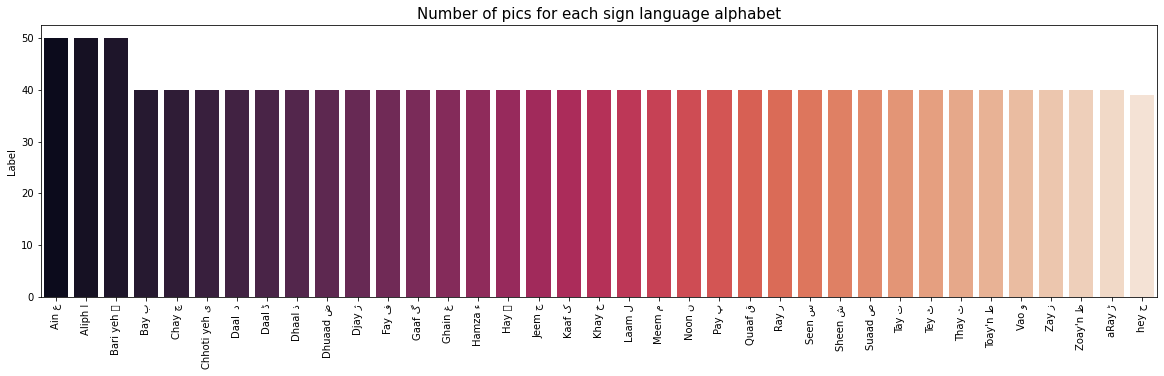

In [5]:
plt.figure(figsize=(20,12))
valuesofthelabels = df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = sorted(valuesofthelabels.index), y = valuesofthelabels, palette = "rocket")
plt.title("Number of pics for each sign language alphabet", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

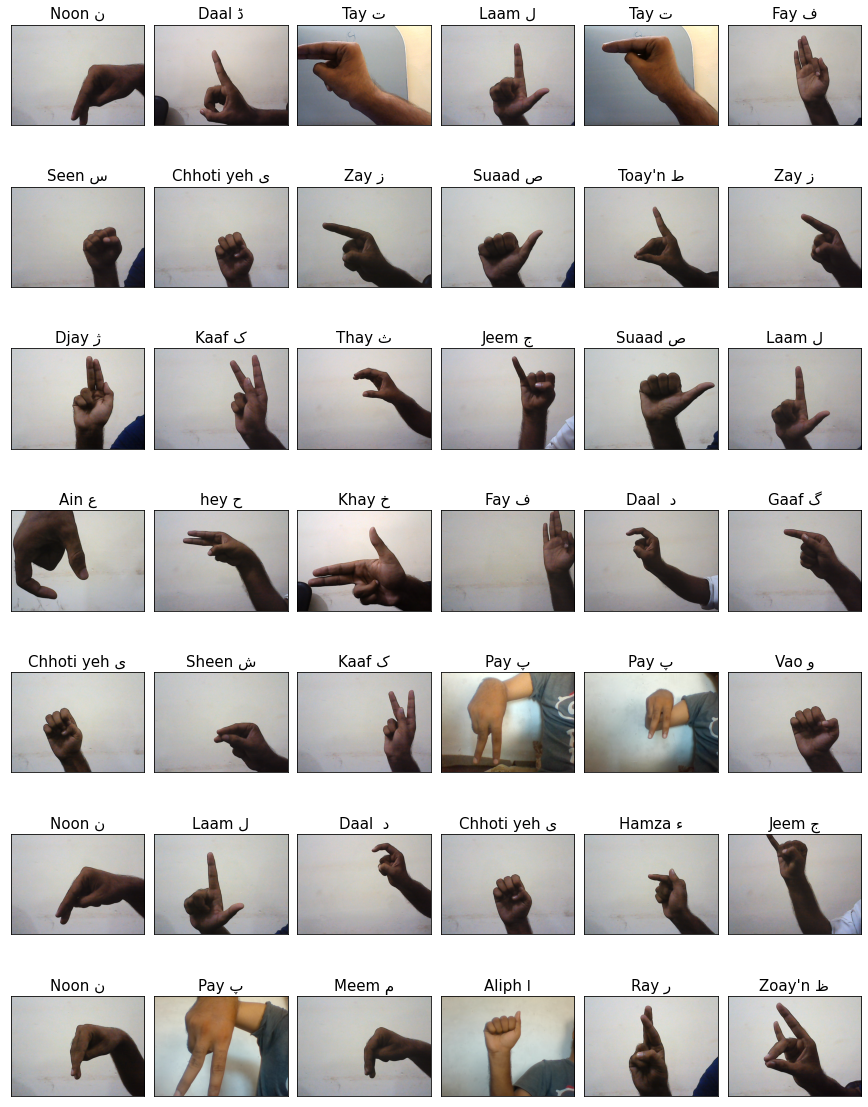

In [6]:
fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(12, 16),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()

In [7]:
trainingdataframe, testingdataframe = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
def create_gen():
    
    traingen = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    testgen= tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    trainingimages = traingen.flow_from_dataframe(
        dataframe=trainingdataframe,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='training',
         rotation_range=30, 
         zoom_range=0.15,
         width_shift_range=0.2,
         height_shift_range=0.2,
         shear_range=0.15,
         horizontal_flip=True,
         fill_mode="nearest"
    )

    validationimages = traingen.flow_from_dataframe(
        dataframe=trainingdataframe,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30, 
         zoom_range=0.15,
         width_shift_range=0.2,
         height_shift_range=0.2,
         shear_range=0.15,
         horizontal_flip=True,
         fill_mode="nearest"
    )

    testingimages = testgen.flow_from_dataframe(
        dataframe=testingdataframe,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return traingen,testgen,trainingimages,validationimages,testingimages

In [9]:
traingen,testgen,trainingimages,validationimages,testingimages=create_gen()

Found 1087 validated image filenames belonging to 37 classes.
Found 120 validated image filenames belonging to 37 classes.
Found 302 validated image filenames belonging to 37 classes.


In [10]:
ConvModel= tf.keras.models.Sequential()
# add convolutional and pooling layer
ConvModel.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu',padding='same',input_shape=[224, 224, 3]))
ConvModel.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
ConvModel.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'))
ConvModel.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
ConvModel.add(tf.keras.layers.Dropout(0.2))
ConvModel.add(tf.keras.layers.Flatten())
ConvModel.add(tf.keras.layers.BatchNormalization())
ConvModel.add(tf.keras.layers.Dense(37,activation='softmax'))

In [11]:
from keras.optimizers import Adam
Opti=Adam(lr=0.001)
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
ROP = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=1,min_lr=0.00001)
EarlyS=EarlyStopping( monitor='val_loss',patience=1,mode="min")
saving_best_model_weights=mcp_save = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/CV emnist project/CVmodel.h5', save_best_only=True, monitor='val_loss', mode='auto')
ConvModel.compile(loss='categorical_crossentropy', optimizer=Opti, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
# Use the whole data which is split into training and test datasets
trainingdataframe, testingdataframe = train_test_split(df, test_size=0.1, random_state=0)


traingen,testgen,trainingimages,validationimages,testingimages=create_gen()
hist= ConvModel.fit(trainingimages,
                    validation_data=validationimages,
                    epochs=1,
                    callbacks=[EarlyS,saving_best_model_weights,ROP]                     
                    )

Found 1223 validated image filenames belonging to 37 classes.
Found 135 validated image filenames belonging to 37 classes.
Found 151 validated image filenames belonging to 36 classes.
39/39 [==============================] - 456s 12s/step - loss: 1.7944 - accuracy: 0.6034 - val_loss: 2.9322 - val_accuracy: 0.1704
